<a href="https://colab.research.google.com/github/dikshacr123/robotics-club/blob/main/face__expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [25]:
df=pd.read_csv("/content/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [26]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [27]:
expression={0:'anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'nuetral'}

In [28]:
np.array(df.pixels.loc[1].split(" ")).reshape(48,48)

array([['151', '150', '147', ..., '129', '140', '120'],
       ['151', '149', '149', ..., '122', '141', '137'],
       ['151', '151', '156', ..., '109', '123', '146'],
       ...,
       ['188', '188', '121', ..., '185', '185', '186'],
       ['188', '187', '196', ..., '186', '182', '187'],
       ['186', '184', '185', ..., '193', '183', '184']], dtype='<U3')

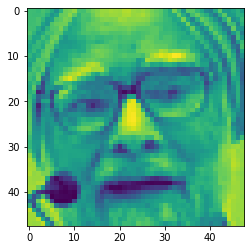

In [29]:
plt.imshow(np.array(df.pixels.loc[1].split(" ")).reshape(48,48).astype('float'))

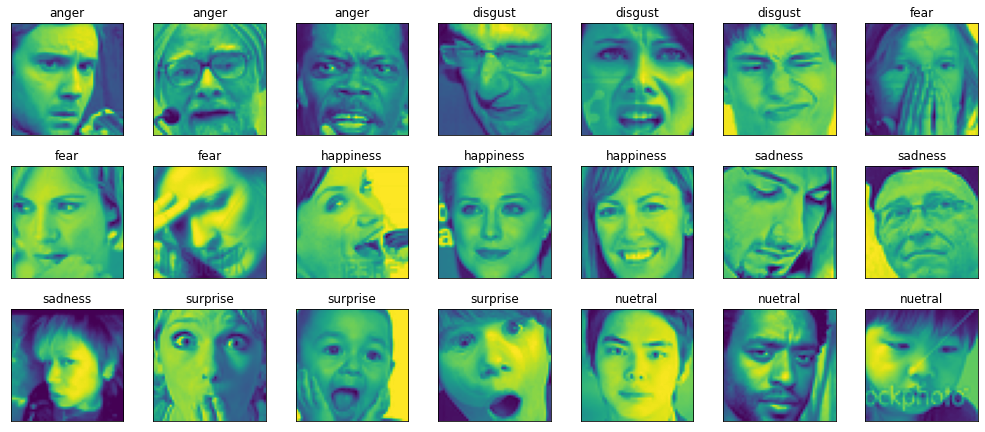

In [30]:
fig=plt.figure(1,(14,14))
k=0
for label in sorted(df.emotion.unique()):
  for j in range(3):
    px=df[df.emotion==label].pixels.iloc[k]
    px=np.array(px.split(' ')).reshape(48,48).astype('float')
    k+=1
    ax=plt.subplot(7,7,k)
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(expression[label])
    plt.tight_layout()

In [31]:
img_array=df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48,48).astype('float64'))

In [33]:
img_array.shape

(35887,)

In [34]:
img_array=np.stack(img_array,axis=0)

In [35]:
img_array.shape

(35887, 48, 48)

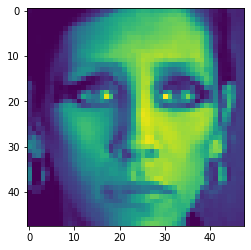

In [36]:
plt.imshow(img_array[4])

In [37]:
labels=df.emotion.values

In [43]:
x_train,x_test,y_train,y_test=train_test_split(img_array,labels,test_size=0.2)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28709, 48, 48), (7178, 48, 48), (28709,), (7178,))

In [45]:
x_train=x_train/255
x_test=x_test/255

In [70]:
basemodels=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
                                       tf.keras.layers.MaxPool2D(2,2),
                                       tf.keras.layers.BatchNormalization(),
                                       
                                       tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
                                       tf.keras.layers.MaxPool2D(2,2),
                                       tf.keras.layers.BatchNormalization(),
                                       
                                       tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)),
                                       tf.keras.layers.MaxPool2D(2,2),
                                       tf.keras.layers.BatchNormalization(),
                                       
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(128,activation='relu'),
                                       tf.keras.layers.Dense(7,activation='softmax')])

In [73]:
basemodels.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [74]:
try:
  os.mkdir('checkpoint')
except:
  pass

In [75]:
file_name='best model'

checkpoint_path=os.path.join('checkpoint',file_name)

call_back=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_freq='epoch',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='max')

In [77]:
basemodels.fit(x_train,y_train,epochs=20,validation_split=.1,callbacks=call_back)

Epoch 1/20
808/808 [==============================] - ETA: 0s - loss: 1.6325 - accuracy: 0.3865
Epoch 1: val_accuracy improved from -inf to 0.43678, saving model to checkpoint/best model


808/808 [==============================] - 114s 139ms/step - loss: 1.6325 - accuracy: 0.3865 - val_loss: 1.4955 - val_accuracy: 0.4368
Epoch 2/20
808/808 [==============================] - ETA: 0s - loss: 1.3156 - accuracy: 0.5065
Epoch 2: val_accuracy improved from 0.43678 to 0.47266, saving model to checkpoint/best model


808/808 [==============================] - 109s 135ms/step - loss: 1.3156 - accuracy: 0.5065 - val_loss: 1.3802 - val_accuracy: 0.4727
Epoch 3/20
808/808 [==============================] - ETA: 0s - loss: 1.1469 - accuracy: 0.5715
Epoch 3: val_accuracy improved from 0.47266 to 0.49112, saving model to checkpoint/best model


808/808 [==============================] - 110s 136ms/step - loss: 1.1469 - accuracy: 0.5715 - val_loss: 1.3711 - val_accuracy: 0.4911
Epoch 4/20
808/808 [==============================] - ETA: 0s - loss: 1.0120 - accuracy: 0.6282
Epoch 4: val_accuracy improved from 0.49112 to 0.51202, saving model to checkpoint/best model


808/808 [==============================] - 108s 133ms/step - loss: 1.0120 - accuracy: 0.6282 - val_loss: 1.3305 - val_accuracy: 0.5120
Epoch 5/20
808/808 [==============================] - ETA: 0s - loss: 0.8956 - accuracy: 0.6837
Epoch 5: val_accuracy improved from 0.51202 to 0.52072, saving model to checkpoint/best model


808/808 [==============================] - 108s 134ms/step - loss: 0.8956 - accuracy: 0.6837 - val_loss: 1.3369 - val_accuracy: 0.5207
Epoch 6/20
808/808 [==============================] - ETA: 0s - loss: 0.7883 - accuracy: 0.7277
Epoch 6: val_accuracy improved from 0.52072 to 0.52107, saving model to checkpoint/best model


808/808 [==============================] - 108s 134ms/step - loss: 0.7883 - accuracy: 0.7277 - val_loss: 1.3365 - val_accuracy: 0.5211
Epoch 7/20
808/808 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.7731
Epoch 7: val_accuracy did not improve from 0.52107
808/808 [==============================] - 108s 133ms/step - loss: 0.6862 - accuracy: 0.7731 - val_loss: 1.3940 - val_accuracy: 0.5051
Epoch 8/20
808/808 [==============================] - ETA: 0s - loss: 0.5947 - accuracy: 0.8096
Epoch 8: val_accuracy did not improve from 0.52107
808/808 [==============================] - 110s 136ms/step - loss: 0.5947 - accuracy: 0.8096 - val_loss: 1.4056 - val_accuracy: 0.5155
Epoch 9/20
808/808 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.8455
Epoch 9: val_accuracy did not improve from 0.52107
808/808 [==============================] - 106s 131ms/step - loss: 0.5068 - accuracy: 0.8455 - val_loss: 1.4717 - val_accuracy: 0.5113
Epoch 10/20
808/808

808/808 [==============================] - 108s 134ms/step - loss: 0.4262 - accuracy: 0.8780 - val_loss: 1.4708 - val_accuracy: 0.5228
Epoch 11/20
808/808 [==============================] - ETA: 0s - loss: 0.3574 - accuracy: 0.9024
Epoch 11: val_accuracy did not improve from 0.52281
808/808 [==============================] - 108s 133ms/step - loss: 0.3574 - accuracy: 0.9024 - val_loss: 1.5431 - val_accuracy: 0.5207
Epoch 12/20
808/808 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.9297
Epoch 12: val_accuracy improved from 0.52281 to 0.53187, saving model to checkpoint/best model


808/808 [==============================] - 114s 141ms/step - loss: 0.2884 - accuracy: 0.9297 - val_loss: 1.6040 - val_accuracy: 0.5319
Epoch 13/20
808/808 [==============================] - ETA: 0s - loss: 0.2354 - accuracy: 0.9469
Epoch 13: val_accuracy did not improve from 0.53187
808/808 [==============================] - 108s 133ms/step - loss: 0.2354 - accuracy: 0.9469 - val_loss: 1.6580 - val_accuracy: 0.5211
Epoch 14/20
808/808 [==============================] - ETA: 0s - loss: 0.1865 - accuracy: 0.9624
Epoch 14: val_accuracy improved from 0.53187 to 0.53466, saving model to checkpoint/best model


808/808 [==============================] - 110s 137ms/step - loss: 0.1865 - accuracy: 0.9624 - val_loss: 1.7421 - val_accuracy: 0.5347
Epoch 15/20
808/808 [==============================] - ETA: 0s - loss: 0.1472 - accuracy: 0.9734
Epoch 15: val_accuracy improved from 0.53466 to 0.53535, saving model to checkpoint/best model


808/808 [==============================] - 113s 140ms/step - loss: 0.1472 - accuracy: 0.9734 - val_loss: 1.8655 - val_accuracy: 0.5354
Epoch 16/20
808/808 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.9817
Epoch 16: val_accuracy did not improve from 0.53535
808/808 [==============================] - 113s 139ms/step - loss: 0.1171 - accuracy: 0.9817 - val_loss: 1.9013 - val_accuracy: 0.5193
Epoch 17/20
808/808 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.9864
Epoch 17: val_accuracy did not improve from 0.53535
808/808 [==============================] - 111s 137ms/step - loss: 0.0934 - accuracy: 0.9864 - val_loss: 2.0159 - val_accuracy: 0.5305
Epoch 18/20
808/808 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9902
Epoch 18: val_accuracy did not improve from 0.53535
808/808 [==============================] - 110s 136ms/step - loss: 0.0761 - accuracy: 0.9902 - val_loss: 2.1077 - val_accuracy: 0.5333
Epoch 19/20
8

actual label is nuetral
1/1 [==============================] - 0s 24ms/step
predicted label is nuetral


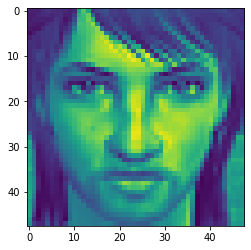

KeyboardInterrupt: ignored

In [81]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(40):
  print(f'actual label is {expression[y_test[k]]}')
  predicted_class=final_model.predict(tf.expand_dims(x_test[k],0)).argmax()
  print(f'predicted label is {expression[predicted_class]}')
  plt.imshow(x_test[k].reshape(48,48))
  plt.show()
  time.sleep(2)
  clear_output(wait=True)
